In [100]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")    # (Optional)

In [68]:
pip install colorama


In [119]:

# 加载数据
data_path = '/content/drive/MyDrive/546-project/CC GENERAL.csv'
df = pd.read_csv(data_path)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


1.CUST_ID：信用卡持有人的身份（分类）

2.BALANCE：其帐户中用于购买的余额金额

3.BALANCE_FREQUENCY：余额更新的频率，分数介于 0 和 1 之间（1 = 经常更新，0 = 不经常更新）

4.PURCHASES：从帐户进行的购买金额

5.ONEOFF_PURCHASES：一次性完成的最大购买金额

6.INSTALLMENTS_PURCHASES：分期完成的购买金额

7.CASH_ADVANCE：用户预付的现金

8.PURCHASES_FREQUENCY：进行购买的频率，评分在 0 到 1 之间（1 = 经常购买，0 = 不经常购买）

9.ONEOFFPURCHASESFREQUENCY：一次性购买的频率（1 = 经常购买，0 = 不经常购买）

10.PURCHASESINSTALLMENTSFREQUENCY：分期购买的频率（1 = 经常购买，0 = 不经常进行）

11.CASHADVANCEFREQUENCY : 预付现金的频率

12.CASHADVANCETRX : 使用“预付现金”进行的交易数量

13.PURCHASES_TRX : 进行的购买交易数量

14.CREDIT_LIMIT : 用户信用卡限额

15.PAYMENTS : 用户完成的付款金额

16.MINIMUM_PAYMENTS：用户支付的最低金额

17.PRCFULLPAYMENT：用户支付的全额付款的百分比

18.TENURE：用户信用卡服务的期限

In [120]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [121]:
#overview

df_overview = []
columns = df . columns . drop("CUST_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'aqua', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,BALANCE,float64,8871,0,0.000000,0
1,BALANCE_FREQUENCY,float64,43,0,0.000000,0
2,PURCHASES,float64,6203,0,0.000000,0
3,ONEOFF_PURCHASES,float64,4014,0,0.000000,0
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000,0
5,CASH_ADVANCE,float64,4323,0,0.000000,0
6,PURCHASES_FREQUENCY,float64,47,0,0.000000,0
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


In [123]:
df.drop('CUST_ID', axis=1, inplace = True)

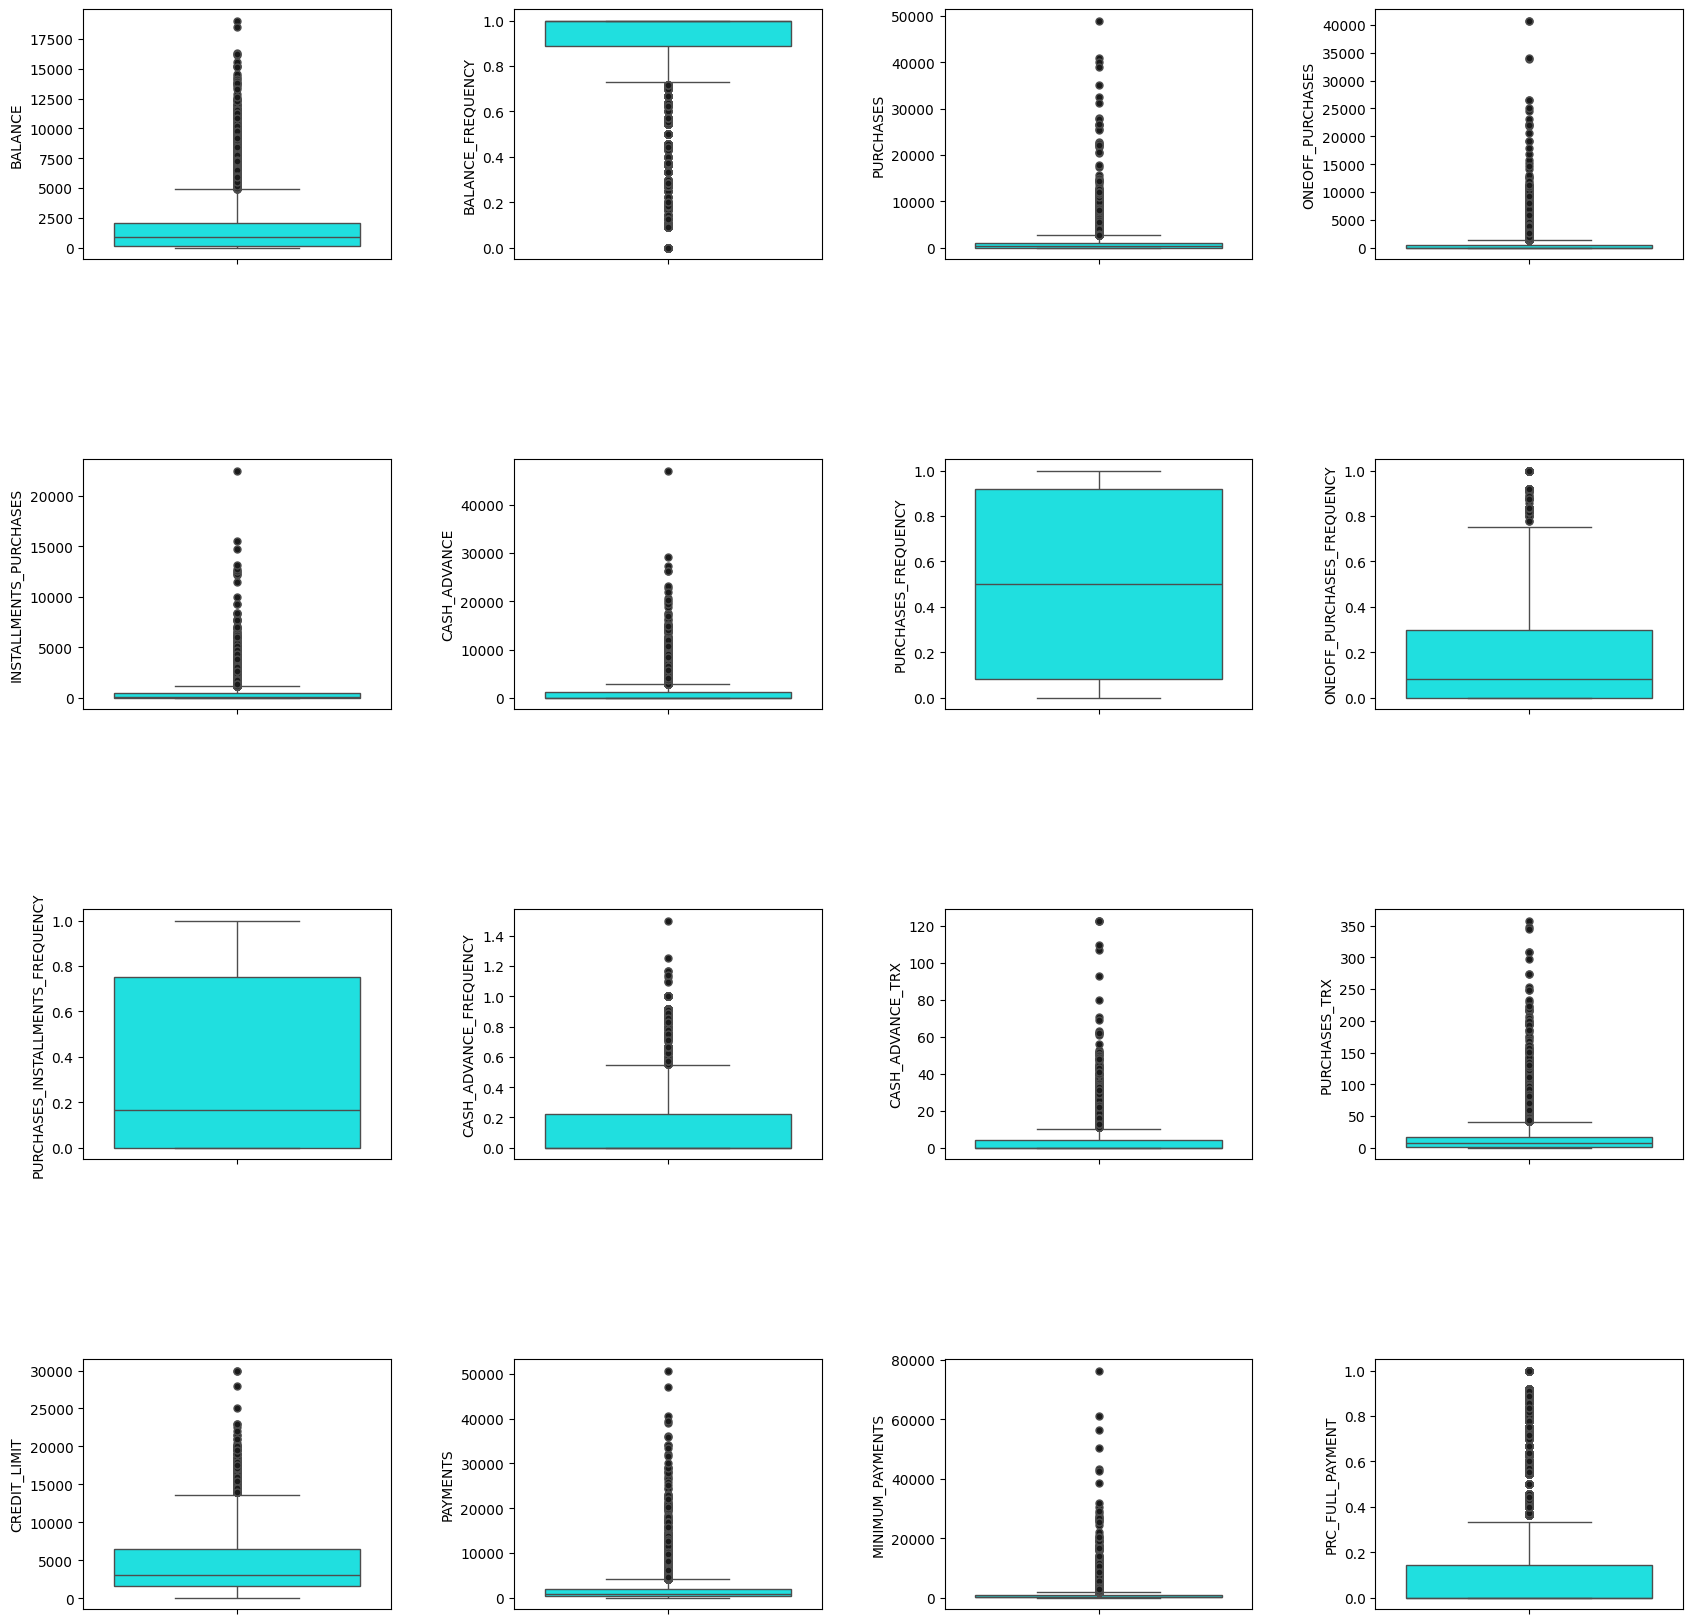

In [124]:
#Using Box plot

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):

    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))




In [125]:
#finding outliers base on the Inter Quantile Range(IQR)
# 找到异常值，并统计每列异常值的数量
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out


,count_out
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


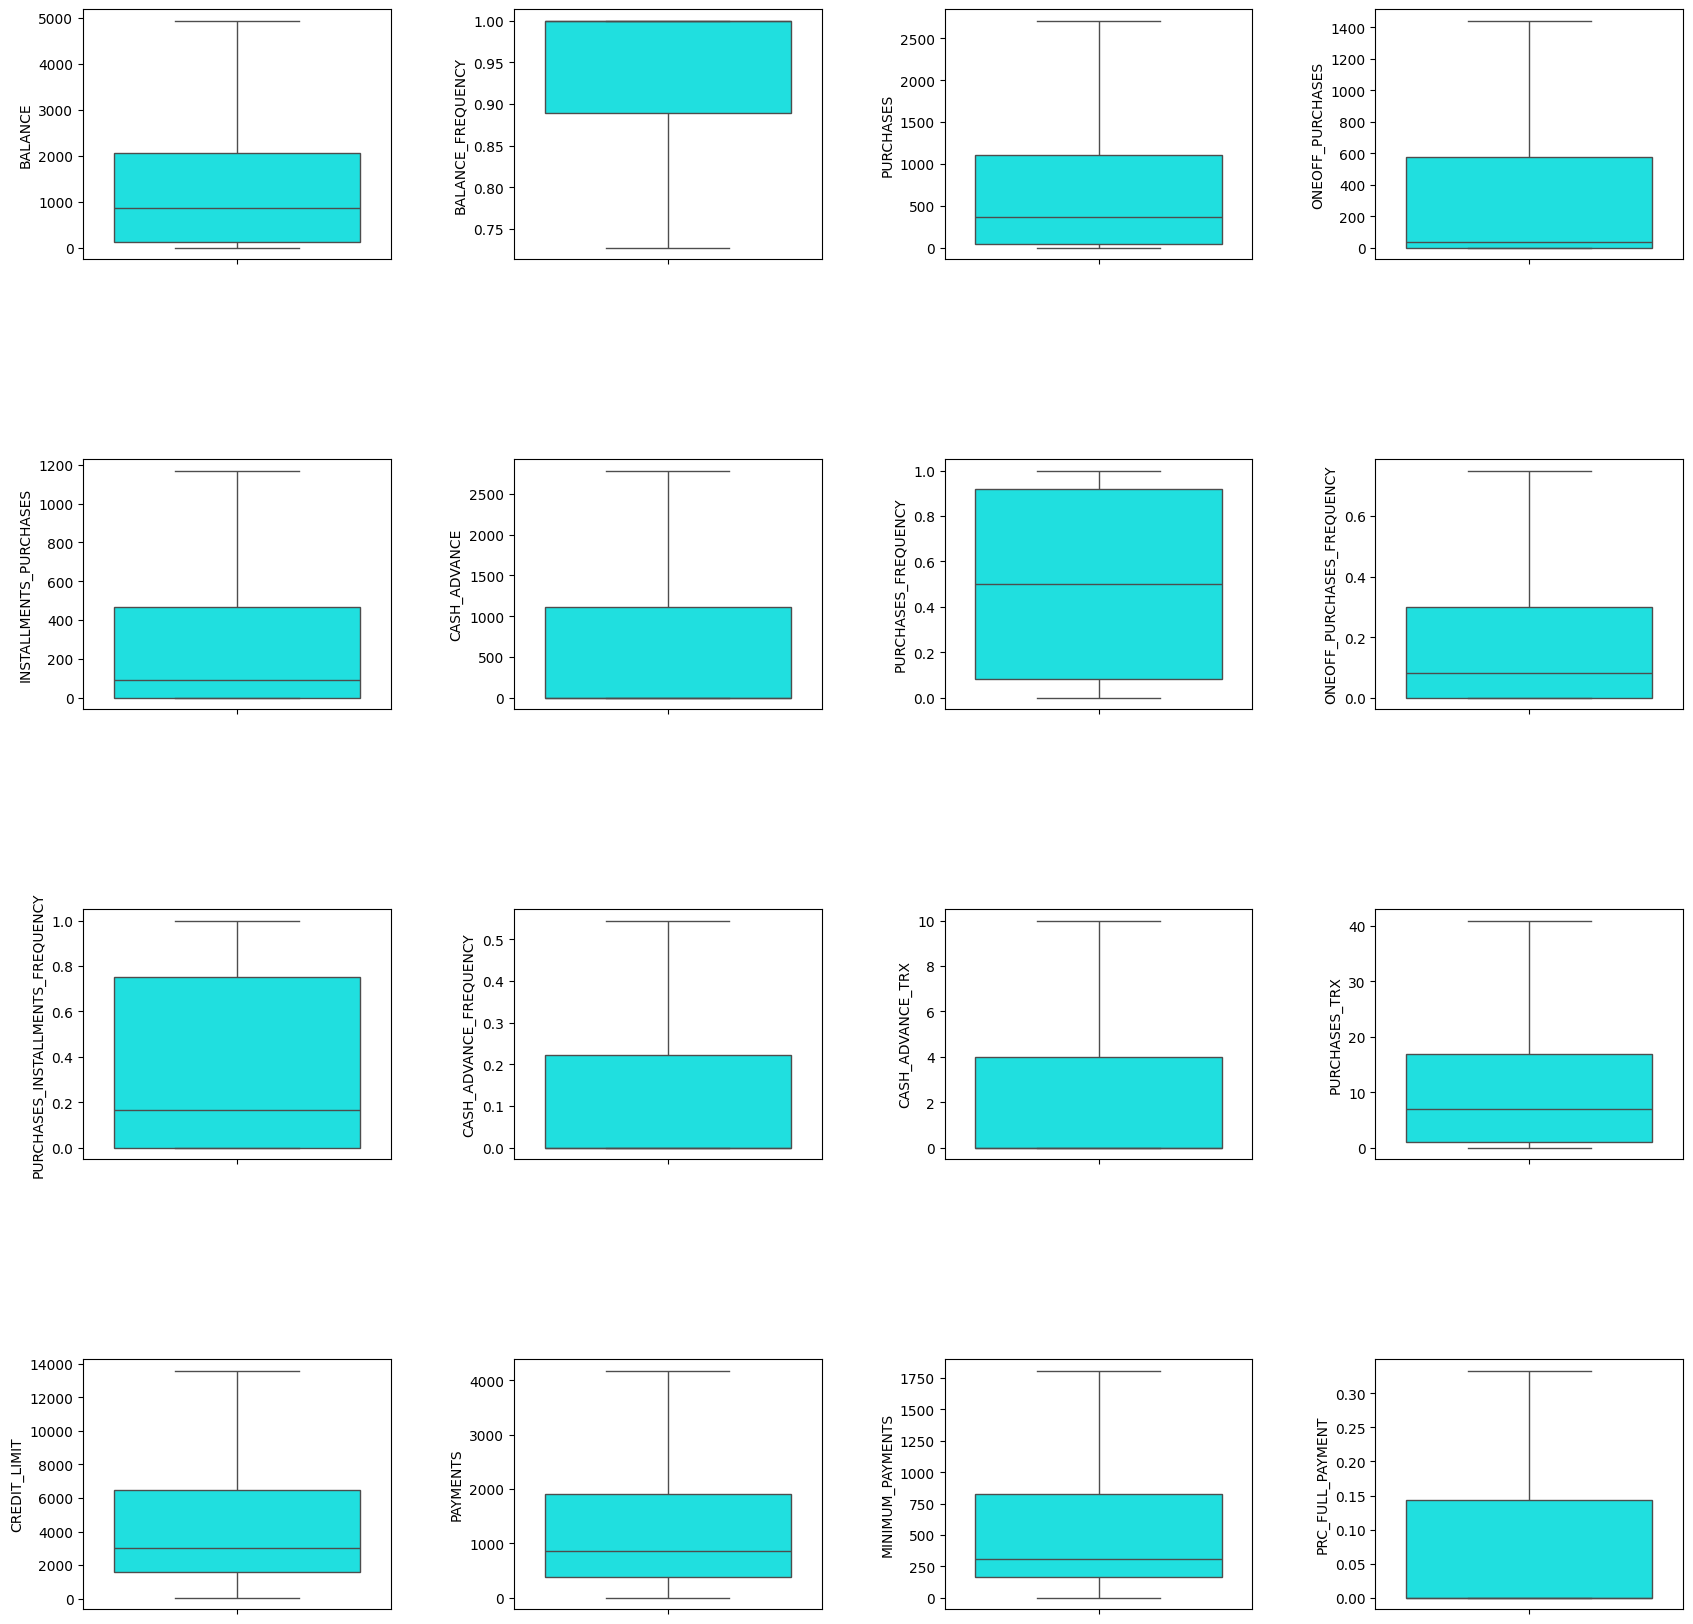

In [107]:

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
#showfliers = False 不显示异常值
for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False ,color='aqua')


In [108]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
df.drop(columns=['PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [127]:
df.drop([5203], axis=0, inplace=True)#去除缺失值
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,2,0,500.0,52.549959,55.755628,0.250000,6


In [113]:
 #Dropping some of outliers
df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]

In [114]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [128]:
df.skew()

BALANCE                        2.393270
BALANCE_FREQUENCY             -2.024193
PURCHASES                      8.143969
INSTALLMENTS_PURCHASES         7.298823
CASH_ADVANCE                   5.166323
PURCHASES_FREQUENCY            0.059970
ONEOFF_PURCHASES_FREQUENCY     1.535453
CASH_ADVANCE_TRX               5.720976
PURCHASES_TRX                  4.630493
CREDIT_LIMIT                   1.522464
PAYMENTS                       5.907465
MINIMUM_PAYMENTS              13.622193
PRC_FULL_PAYMENT               1.942641
TENURE                        -2.944788
dtype: float64

In [129]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df[skewness_features] = np.log(df[skewness_features] + 0.1)

In [131]:
df.skew()

BALANCE                      -1.178399
BALANCE_FREQUENCY            -2.024193
PURCHASES                    -0.971036
INSTALLMENTS_PURCHASES       -0.124961
CASH_ADVANCE                  0.185856
PURCHASES_FREQUENCY           0.059970
ONEOFF_PURCHASES_FREQUENCY    1.535453
CASH_ADVANCE_TRX              0.410488
PURCHASES_TRX                -0.582282
CREDIT_LIMIT                 -0.102317
PAYMENTS                     -2.730197
MINIMUM_PAYMENTS              0.101950
PRC_FULL_PAYMENT              1.942641
TENURE                       -2.944788
dtype: float64

<Axes: >

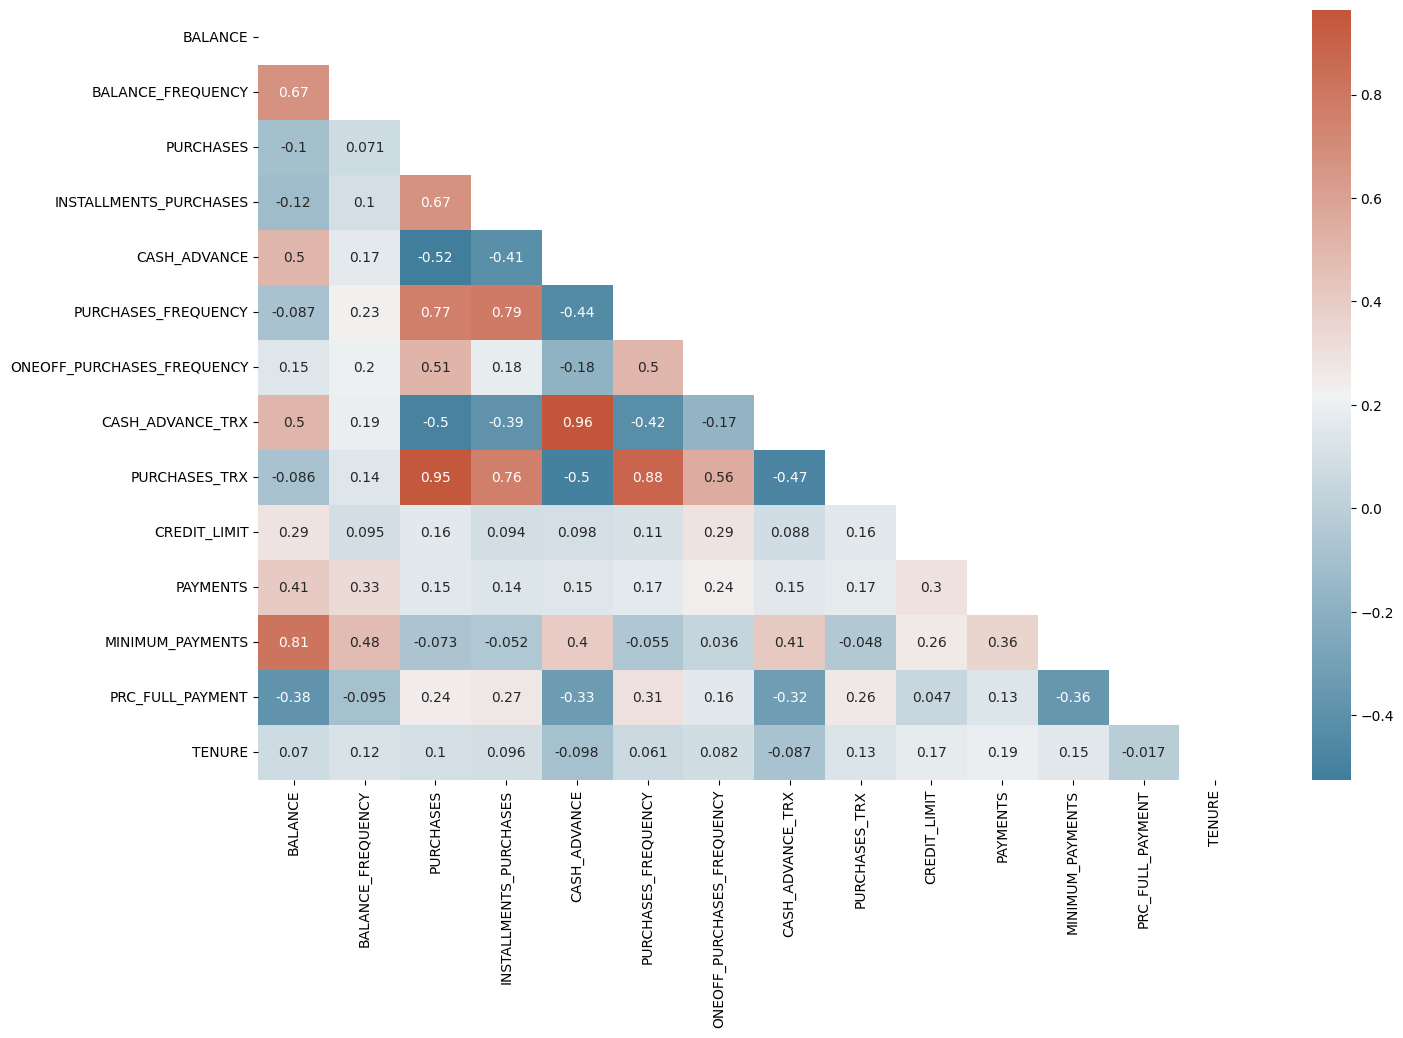

In [132]:
#correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

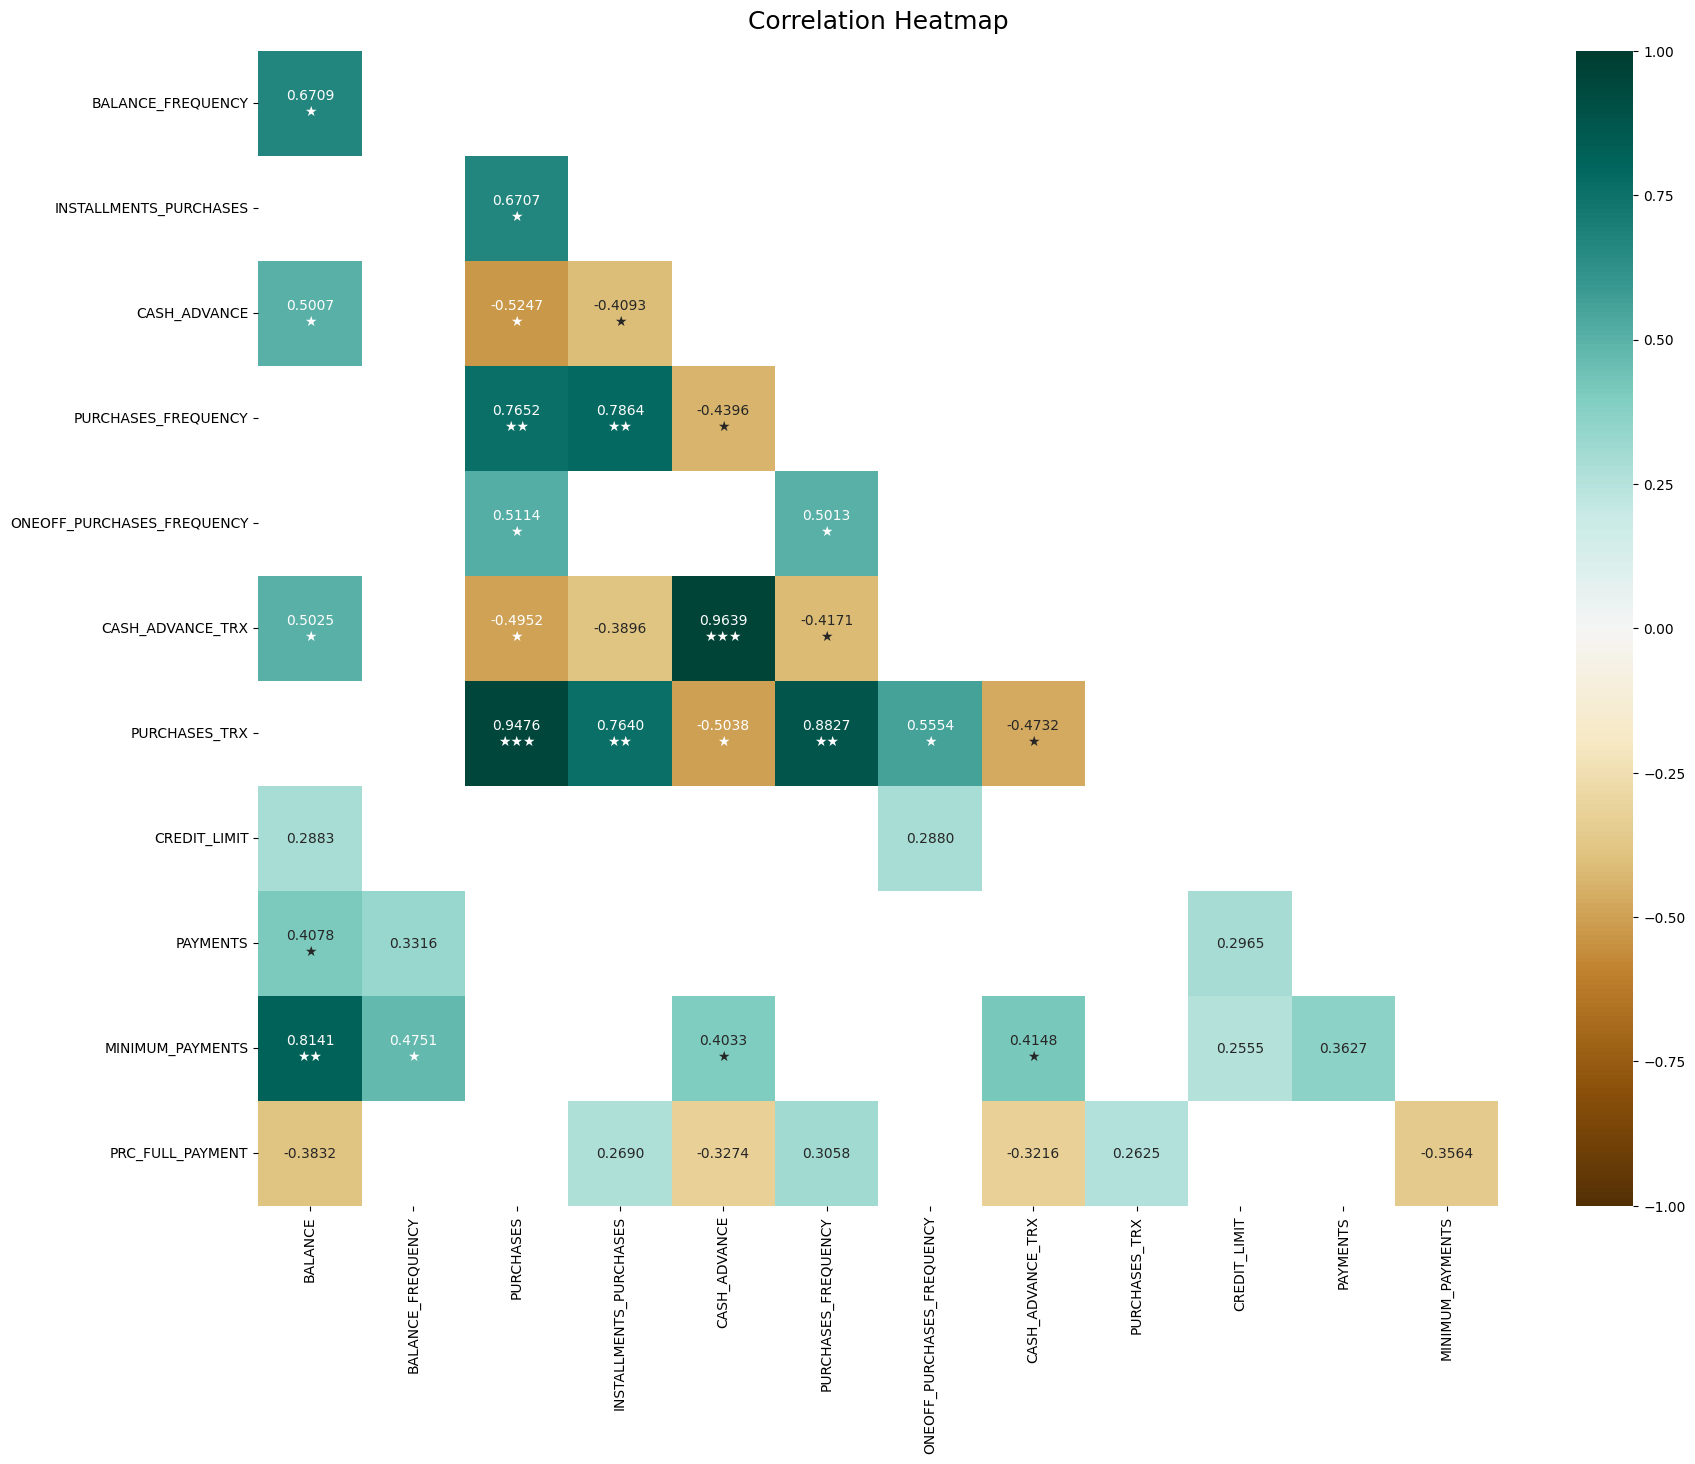

In [133]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones_like(corr, dtype=bool)) #使用np.triu创建一个掩码来隐藏热图的上三角部分，因为相关性矩阵是对称的，上三角和下三角包含相同的信息。

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.4# show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off # 更新了掩码，以便隐藏绝对值小于cut_off的相关性值，这意味着只有那些绝对值大于或等于cut_off的相关性值才会显示在热图上。
corr = corr[~mask]  # fill in NaN in the non-desired cells 填充掩码覆盖的单元格为NaN，实际上隐藏了这些单元格的值。

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

In [135]:
df.dropna(inplace=True)

In [86]:
from sklearn.preprocessing import StandardScaler
df_model=df.copy()

scaler= StandardScaler()
df_Standardize=pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns) #归一化完后的数据集
df_Standardize

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.745369,-0.248785,-0.465787,-0.397088,-0.365854,-0.476844,-0.805116,-0.677987,-0.706172,-0.675708,-0.482201,-0.520766,-0.965868,-0.549205,-0.324378,-0.525663,0.360754
1,0.822978,0.134866,-0.516362,-0.397088,-0.479339,2.682990,-1.220469,-0.677987,-0.915974,0.576272,0.114210,-0.603824,0.705048,0.877253,0.123457,0.234367,0.360754
2,0.472101,0.518517,-0.106471,0.140262,-0.479339,-0.476844,1.271643,2.681612,-0.915974,-0.675708,-0.482201,-0.105476,0.844291,-0.395538,-0.090206,-0.525663,0.360754
3,0.061121,-1.016087,0.278323,0.644711,-0.479339,-0.375919,-1.012794,-0.398022,-0.915974,-0.258383,-0.333098,-0.562295,0.844291,-0.622992,-0.391354,-0.525663,0.360754
4,-0.360018,0.518517,-0.507880,-0.385968,-0.479339,-0.476844,-1.012794,-0.398022,-0.915974,-0.675708,-0.482201,-0.562295,-0.910171,-0.374964,-0.273834,-0.525663,0.360754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,-0.751524,0.518517,-0.362027,-0.397088,-0.133031,-0.476844,1.271643,-0.677987,1.182060,-0.675708,-0.482201,-0.354650,-0.965868,-0.503941,-0.367885,1.184407,-4.124481
8927,-0.756142,0.518517,-0.357319,-0.397088,-0.122468,-0.476844,1.271643,-0.677987,1.182060,-0.675708,-0.482201,-0.354650,-0.965868,-0.522125,-0.258918,-0.525663,-4.124481
8928,-0.754051,-0.184845,-0.439810,-0.397088,-0.307565,-0.476844,0.856290,-0.677987,0.762454,-0.675708,-0.482201,-0.396179,-0.965868,-0.593276,-0.351786,0.329372,-4.124481
8929,-0.758982,-0.184845,-0.516362,-0.397088,-0.479339,-0.458914,-1.220469,-0.677987,-0.915974,0.158947,-0.183995,-0.603824,-1.105111,-0.603778,-0.364587,0.329372,-4.124481


In [52]:
from sklearn.cluster import KMeans

In [88]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    inertias.append(kmeans.inertia_)

In [54]:
!pip install kneed

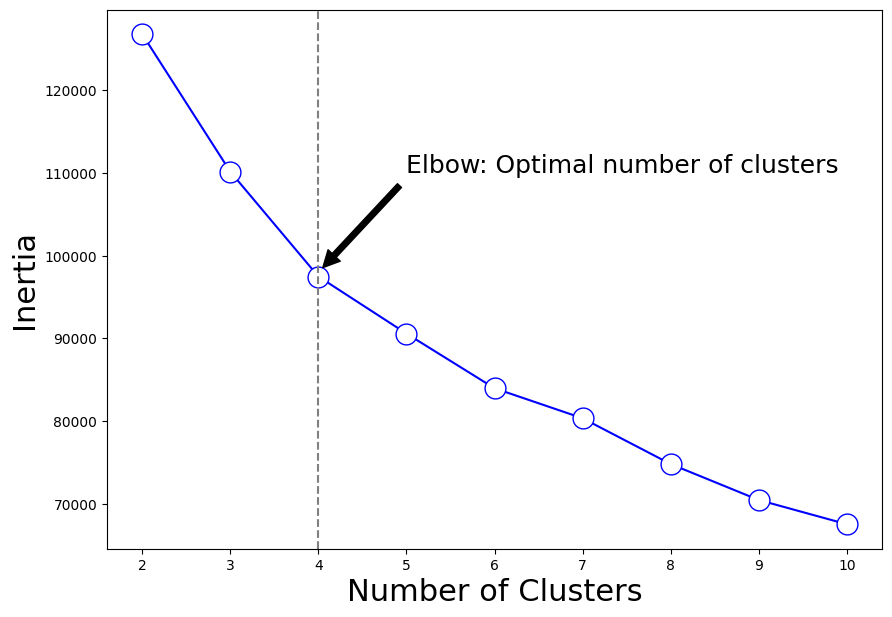

In [89]:
#使用elbow method 确定最佳的 K值
from kneed import KneeLocator, DataGenerator
kelbow = KneeLocator(range(2, 11), inertias, curve = 'convex', direction = 'decreasing')
kelbow.elbow

fig, ax = plt.subplots(facecolor="white",figsize = (10 ,7))

plt.plot(np.arange(2 , 11) , inertias  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
plt.xlabel('Number of Clusters',fontname="Gabriola",fontsize=22) , plt.ylabel('Inertia',fontname="Gabriola",fontsize=22)
plt. grid(False)

plt.annotate('Elbow: Optimal number of clusters  ', xy=(4, 98000), xytext=(5, 110000),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='black', shrink=0.05),)

ax.set_facecolor("white")


plt.axvline(x=kelbow.elbow, color ='gray', label = 'axvline - full height', ls = '--')
plt.show()

In [56]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    S_score = silhouette_score(df_Standardize, kmeans.labels_)
    silhouette.append(S_score)

calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    C_score = calinski_harabasz_score(df_Standardize, kmeans.labels_)
    calinski_harabasz.append(C_score)

davies_bouldin = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    D_score = davies_bouldin_score(df_Standardize, kmeans.labels_)
    davies_bouldin.append(D_score)

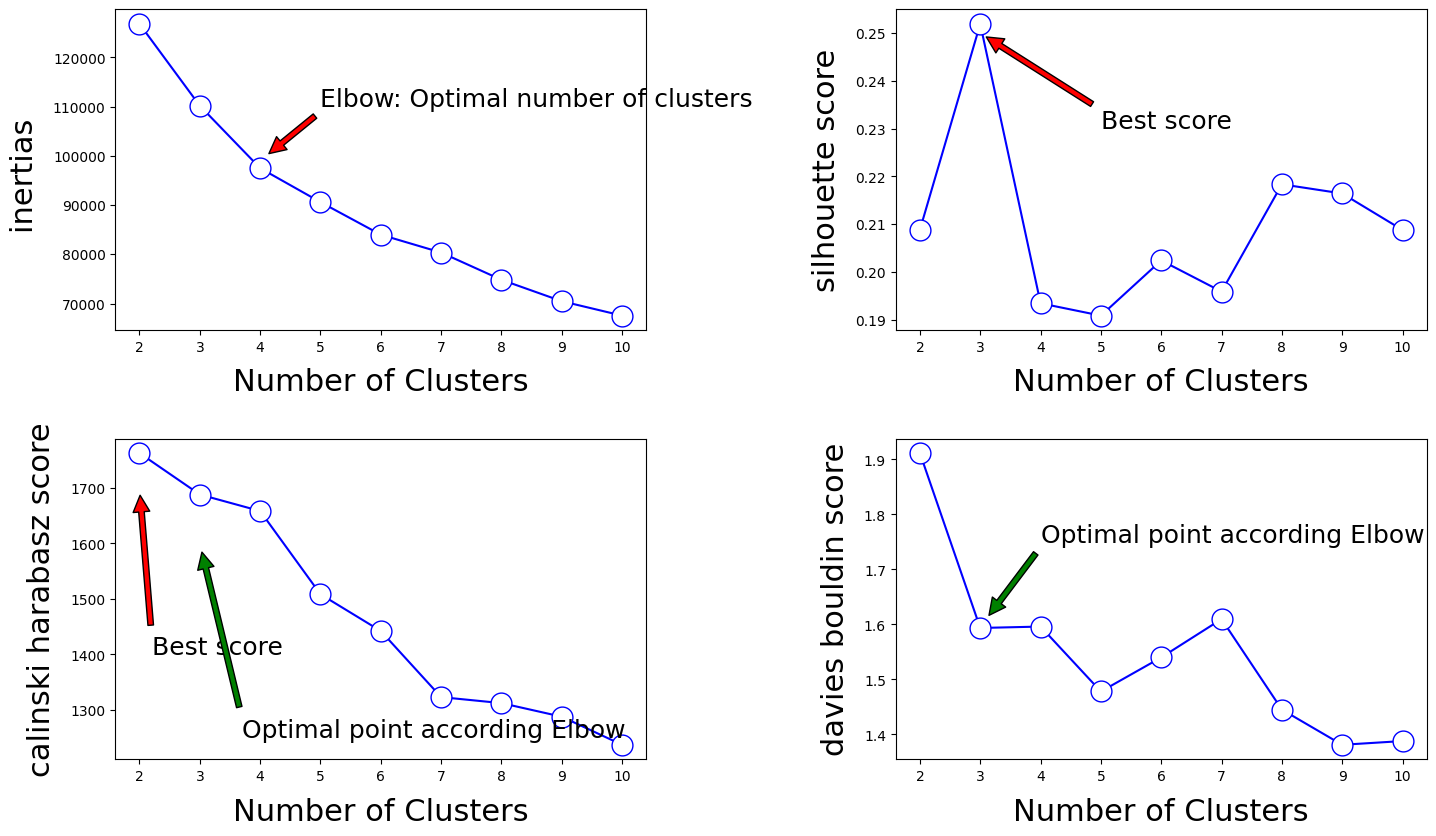

In [57]:
fig, ax = plt.subplots(2,2,facecolor="white",figsize = (15 ,9))

ax[0][0].plot(np.arange(2 , 11) , inertias  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
ax[0][1].plot(np.arange(2 , 11) , silhouette,  color='b', marker='.', markersize=30,markerfacecolor='white')
ax[1][0].plot(np.arange(2 , 11) , calinski_harabasz  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
ax[1][1].plot(np.arange(2 , 11) , davies_bouldin  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')

ax[0][0].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)
ax[0][1].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][0].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][1].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)

ax[0][0].set_ylabel('inertias ',fontname="Gabriola",fontsize=22,labelpad=10)
ax[0][1].set_ylabel('silhouette score',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][0].set_ylabel('calinski harabasz score',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][1].set_ylabel('davies bouldin score',fontname="Gabriola",fontsize=22,labelpad=10)


plt. grid(False)

ax[0][0].annotate('Elbow: Optimal number of clusters  ', xy=(4.1, 100000), xytext=(5, 110000),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='red', shrink=0.05),)

ax[0][1].annotate('Best score', xy=(3, 0.25), xytext=(5, 0.23),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='red', shrink=0.05),)

ax[1][0].annotate('Best score', xy=(2,1700), xytext=(2.2, 1400),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='red', shrink=0.05),)
ax[1][0].annotate('Optimal point according Elbow', xy=(3,1600), xytext=(3.7, 1250),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='green', shrink=0.05),)

ax[1][1].annotate('Best score', xy=(7, 1.31), xytext=(7, 1.6),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='red', shrink=0.05),)
ax[1][1].annotate('Optimal point according Elbow', xy=(3.1, 1.61), xytext=(4, 1.75),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='green', shrink=0.05),)

fig.tight_layout(pad=3)



plt.show()

In [58]:
#assign optimal cluster to kmeans algoritm
Kmean_pred = KMeans(n_clusters=3, **kmeans_set )
Kmean_pred.fit(df_Standardize)
labels = Kmean_pred.labels_
#normalize centroids
centroids = pd.DataFrame(data=Kmean_pred.cluster_centers_ , columns = [df_Standardize.columns])
#real centroids
r_centers = scaler.inverse_transform(centroids)
real_centroids = pd.DataFrame(data = r_centers, columns = [df.columns])
real_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2153.821457,0.981051,4088.019076,2596.331720,1492.169670,487.772231,0.944022,0.665008,0.737291,0.066784,1.657556,55.176045,7601.567524,3994.563026,1112.346865,0.297598,11.916399
1,792.183601,0.834705,498.866618,247.075949,252.113259,325.043609,0.465378,0.131907,0.345733,0.067910,1.201808,8.635990,3266.503465,903.644815,498.981305,0.155972,11.479376
2,3923.122113,0.957600,360.631074,230.625025,130.083246,3807.025417,0.229473,0.107620,0.142525,0.442401,12.177278,5.409488,6600.002837,2964.395182,1785.473241,0.033308,11.352060


In [60]:
df['cluster']=labels
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6,1
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [61]:
df_count = df.groupby(by=["cluster"]).size().reset_index(name="counts")
df_count

,cluster,counts
0,0,1244
1,1,6086
2,2,1601


In [62]:
# Bar plot

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]], shared_yaxes=True, horizontal_spacing=0.07)

# specs=[[{}, {}]] is used for secondry_y

# bar plot for Score
fig.append_trace(go.Bar(x=df_count["cluster"], y=df_count["counts"], orientation='v', showlegend=False,
                 marker=dict(color='aqua',line=dict(color='darkblue',width=2)),
                 name='clustering distribution', marker_color='aqua',text=df_count["counts"],textfont=dict(
                 family="sans serif", size=15, color="Blue"),textposition='auto',), 1, 1)

fig.append_trace(go.Pie(labels=df_count["cluster"],values=df_count["counts"],
                        marker=dict(colors=['DeepSkyBlue', 'gold', 'lightgreen'],line=dict(color='navy', width=2))
                       ,textfont=dict(family="sans serif", size=15, color="Blue")),1, 2)





fig.update_layout(title='Clustering distribution',font_family="Gabriola",
                  xaxis_title='count ', yaxis_title="cluster ",
                  plot_bgcolor='rgb(255,255,255)', paper_bgcolor='rgb(255,255,255)',
                  title_font=dict(size=35, color='navy', family="Gabriola"),
                  font=dict(color='navy',size=20))

fig.update_layout(
        autosize=False,
        width=900,
        height=500,)   #size of figure

fig.show()

In [63]:
df3['cluster']=labels
df3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_INSTALLMENTS_FREQUENCY2,CASH_ADVANCE_FREQUENCY2,CASH_ADVANCE_TRX2,PURCHASES_TRX2,CREDIT_LIMIT2,PAYMENTS2,MINIMUM_PAYMENTS2,PRC_FULL_PAYMENT2,TENURE2,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,low: 0 _ 0.2,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,low: 0 _ 6040.0,low: 0 _ 10144.3,low: 0 _ 11274.01,low: 0 _ 0.2,Severe: 10.8 _ 12.0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,low: 0 _ 0.2,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,Moderate: 6040.0 _ 12030.0,low: 0 _ 10144.3,low: 0 _ 11274.01,Moderate: 0.2 _ 0.4,Severe: 10.8 _ 12.0,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,low: 0 _ 0.2,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,Moderate: 6040.0 _ 12030.0,low: 0 _ 10144.3,low: 0 _ 11274.01,low: 0 _ 0.2,Severe: 10.8 _ 12.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,low: 0 _ 0.2,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,Moderate: 6040.0 _ 12030.0,low: 0 _ 10144.3,low: 0 _ 11274.01,low: 0 _ 0.2,Severe: 10.8 _ 12.0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,low: 0 _ 0.2,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,low: 0 _ 6040.0,low: 0 _ 10144.3,low: 0 _ 11274.01,low: 0 _ 0.2,Severe: 10.8 _ 12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,Severe: 0.8 _ 1.0,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,low: 0 _ 6040.0,low: 0 _ 10144.3,low: 0 _ 11274.01,High: 0.4 _ 0.6,low: 0 _ 7.2,1
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,Severe: 0.8 _ 1.0,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,low: 0 _ 6040.0,low: 0 _ 10144.3,low: 0 _ 11274.01,low: 0 _ 0.2,low: 0 _ 7.2,1
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,Very High: 0.6 _ 0.8,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,low: 0 _ 6040.0,low: 0 _ 10144.3,low: 0 _ 11274.01,Moderate: 0.2 _ 0.4,low: 0 _ 7.2,1
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,low: 0 _ 0.2,low: 0 _ 0.3,low: 0 _ 24.6,low: 0 _ 69.4,low: 0 _ 6040.0,low: 0 _ 10144.3,low: 0 _ 11274.01,Moderate: 0.2 _ 0.4,low: 0 _ 7.2,1


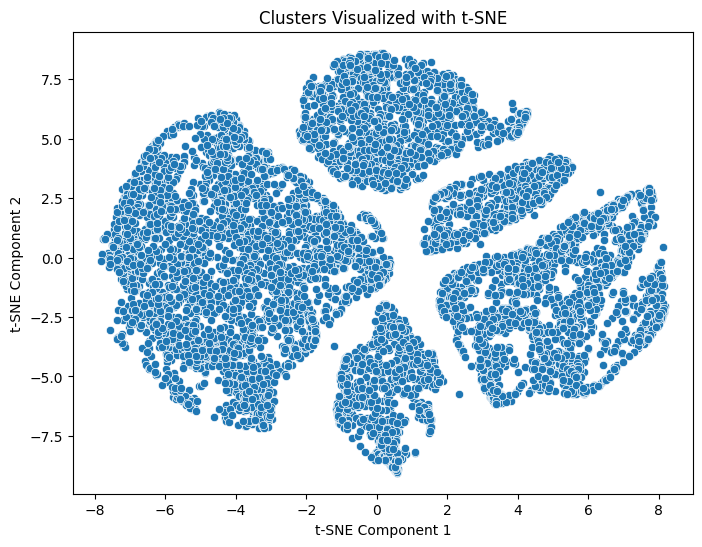

In [136]:
# Apply t-SNE to reduce dimensions to 2 for visualization
from matplotlib import rcParams

rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [139]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 应用DBSCAN算法
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(df)

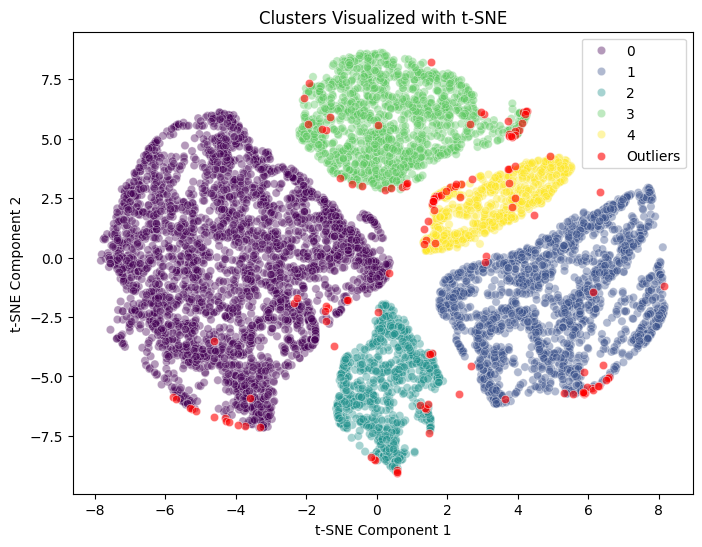

In [140]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = dbscan.labels_

outliers_mask = df_tsne['cluster'] == -1
df_tsne_without_outliers = df_tsne[~outliers_mask]

# Plot clusters with different colors
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_without_outliers, palette='viridis', alpha=0.4)

# Color outliers (cluster = -1) with a specific color
outliers_mask = df_tsne['cluster'] == -1
sns.scatterplot(x=df_tsne.loc[outliers_mask, 't-SNE Component 1'],
                y=df_tsne.loc[outliers_mask, 't-SNE Component 2'],
                color='red',
                label='Outliers',
                alpha=0.6)

plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

In [ ]:
# Number of clusters (K)
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy)